In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("agg_results.csv")

In [12]:
results

,exp,rlr_agents,drowsy_agents,d_num_rnds,d_com_cost,d_inf_time,r_num_rnds,r_com_cost,r_inf_time,r_n_dets
0,0-1,1,0,NaN,NaN,NaN,426.5,3340.169236,2.608948,1.0
1,1-0,0,1,0.410828,5.270798,0.017350,NaN,NaN,NaN,NaN
2,0-2,2,0,NaN,NaN,NaN,426.5,3340.169236,2.628238,1.0
3,1-1,1,1,0.410828,5.270798,0.017204,426.5,3340.169236,2.347540,1.0
4,2-0,0,2,0.410828,5.270798,0.019127,NaN,NaN,NaN,NaN
5,0-3,3,0,NaN,NaN,NaN,426.5,3340.169236,2.848558,1.0
6,1-2,2,1,0.410828,5.270798,0.017118,426.5,3340.169236,2.536461,1.0
7,2-1,1,2,0.410828,5.270798,0.018813,426.5,3340.169236,2.471936,1.0
8,3-0,0,3,0.410828,5.270798,0.025794,NaN,NaN,NaN,NaN
9,0-5,5,0,NaN,NaN,NaN,426.5,3340.169236,3.068031,1.0


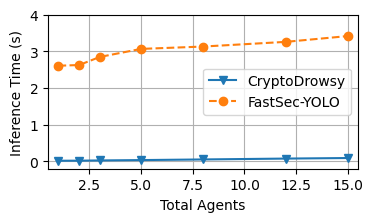

In [3]:
drowsy_0_results = results.loc[results['rlr_agents'] == 0]
rlr_0_results = results.loc[results['drowsy_agents'] == 0]

plt.figure(figsize=(4,2))
plt.plot(drowsy_0_results['drowsy_agents']+drowsy_0_results['rlr_agents'], drowsy_0_results['d_inf_time'], marker='v',label='CryptoDrowsy')
plt.plot(rlr_0_results['rlr_agents']+rlr_0_results['drowsy_agents'], rlr_0_results['r_inf_time'], marker='o',label='FastSec-YOLO',linestyle='--')
plt.legend(loc='center right')
plt.grid(True)
plt.xlim(0.5,15.5)
plt.ylim(-0.2,4)
plt.xlabel('Total Agents')
plt.ylabel('Inference Time (s)')
plt.savefig('figures/x_0_agents_sim.pdf', bbox_inches='tight', pad_inches=0.1)

In [22]:
drowsy_0_results['d_inf_time'].max() - drowsy_0_results['d_inf_time'].min()

0.07410623531179561

In [7]:
runs = dict()
n_total = [1, 2, 3, 5, 8, 12, 15]
c_prop = [0.0, 0.25, 0.5, 0.75, 1.0]
for n in n_total:
    for p in c_prop: 
        n_comp = int(n*p)
        n_rlr = n - n_comp
        if f'{n_comp}-{n_rlr}' in runs: continue
        else: runs[f'{n_comp}-{n_rlr}'] = (n_comp, n_rlr, p, n)

In [ ]:
{'7-8','6-6','4-4','2-3','1-2','1-1'}

In [8]:
runs

{'0-1': (0, 1, 0.0, 1),
 '1-0': (1, 0, 1.0, 1),
 '0-2': (0, 2, 0.0, 2),
 '1-1': (1, 1, 0.5, 2),
 '2-0': (2, 0, 1.0, 2),
 '0-3': (0, 3, 0.0, 3),
 '1-2': (1, 2, 0.5, 3),
 '2-1': (2, 1, 0.75, 3),
 '3-0': (3, 0, 1.0, 3),
 '0-5': (0, 5, 0.0, 5),
 '1-4': (1, 4, 0.25, 5),
 '2-3': (2, 3, 0.5, 5),
 '3-2': (3, 2, 0.75, 5),
 '5-0': (5, 0, 1.0, 5),
 '0-8': (0, 8, 0.0, 8),
 '2-6': (2, 6, 0.25, 8),
 '4-4': (4, 4, 0.5, 8),
 '6-2': (6, 2, 0.75, 8),
 '8-0': (8, 0, 1.0, 8),
 '0-12': (0, 12, 0.0, 12),
 '3-9': (3, 9, 0.25, 12),
 '6-6': (6, 6, 0.5, 12),
 '9-3': (9, 3, 0.75, 12),
 '12-0': (12, 0, 1.0, 12),
 '0-15': (0, 15, 0.0, 15),
 '3-12': (3, 12, 0.25, 15),
 '7-8': (7, 8, 0.5, 15),
 '11-4': (11, 4, 0.75, 15),
 '15-0': (15, 0, 1.0, 15)}

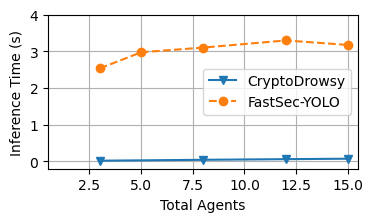

In [4]:
drowsy_075 = {'2-1','4-1','6-2','9-3','11-4'}
rlr_075 = {'1-2','1-4','2-6','3-9','3-12'}
drowsy_075_results = results.loc[results['exp'].isin(drowsy_075)]
rlr_075_results = results.loc[results['exp'].isin(rlr_075)]

plt.figure(figsize=(4,2))
plt.plot(drowsy_075_results['drowsy_agents']+drowsy_075_results['rlr_agents'], drowsy_075_results['d_inf_time'], marker='v',label='CryptoDrowsy')
plt.plot(rlr_075_results['drowsy_agents']+rlr_075_results['rlr_agents'], rlr_075_results['r_inf_time'], marker='o',label='FastSec-YOLO',linestyle='--')
plt.legend(loc='center right')
plt.grid(True)
plt.xlim(0.5,15.5)
plt.ylim(-0.2,4)
plt.xlabel('Total Agents')
plt.ylabel('Inference Time (s)')
plt.savefig('figures/x_075_agents_sim.pdf',bbox_inches='tight', pad_inches=0.1)

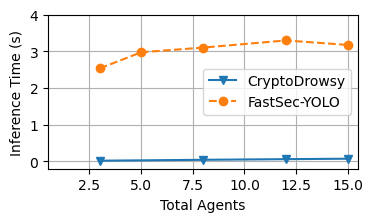

In [5]:
drowsy_075 = {'2-1','4-1','6-2','9-3','11-4'}
rlr_075 = {'1-2','1-4','2-6','3-9','3-12'}
drowsy_075_results = results.loc[results['exp'].isin(drowsy_075)]
rlr_075_results = results.loc[results['exp'].isin(rlr_075)]

plt.figure(figsize=(4,2))
plt.plot(drowsy_075_results['drowsy_agents']+drowsy_075_results['rlr_agents'], drowsy_075_results['d_inf_time'], marker='v',label='CryptoDrowsy')
plt.plot(rlr_075_results['drowsy_agents']+rlr_075_results['rlr_agents'], rlr_075_results['r_inf_time'], marker='o',label='FastSec-YOLO',linestyle='--')
plt.legend(loc='center right')
plt.grid(True)
plt.xlim(0.5,15.5)
plt.ylim(-0.2,4)
plt.xlabel('Total Agents')
plt.ylabel('Inference Time (s)')
plt.savefig('figures/x_075_agents_sim.pdf',bbox_inches='tight', pad_inches=0.1)

In [18]:
rlr_05_results

,exp,rlr_agents,drowsy_agents,d_num_rnds,d_com_cost,d_inf_time,r_num_rnds,r_com_cost,r_inf_time,r_n_dets
3,1-1,1,1,0.410828,5.270798,0.017204,426.5,3340.169236,2.347540,1.0
6,1-2,2,1,0.410828,5.270798,0.017118,426.5,3340.169236,2.536461,1.0
11,2-3,3,2,0.410828,5.270798,0.021271,426.5,3340.169236,2.838730,1.0
16,4-4,4,4,0.410828,5.270798,0.031073,426.5,3340.169236,3.202984,1.0
21,6-6,6,6,0.410828,5.270798,0.042293,426.5,3340.169236,3.359225,1.0
26,7-8,8,7,0.410828,5.270798,0.050847,426.5,3340.169236,3.300207,1.0
32,2-3,3,2,0.410828,5.270798,0.022566,426.5,3340.169236,8.662832,1.0
33,1-2,2,1,0.410828,5.270798,0.017877,426.5,3340.169236,8.416141,1.0


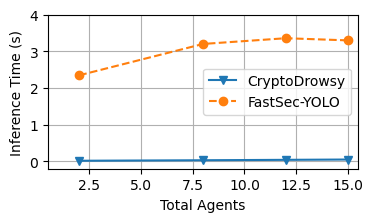

In [6]:
rlr_drowsy_05 = {'7-8','6-6','4-4','1-1'}
drowsy_05_results = results.loc[results['exp'].isin(rlr_drowsy_05)]
rlr_05_results = results.loc[results['exp'].isin(rlr_drowsy_05)]

plt.figure(figsize=(4,2))
plt.plot(drowsy_05_results['drowsy_agents']+drowsy_05_results['rlr_agents'], drowsy_05_results['d_inf_time'], marker='v',label='CryptoDrowsy')
plt.plot(rlr_05_results['drowsy_agents']+rlr_05_results['rlr_agents'], rlr_05_results['r_inf_time'], marker='o',label='FastSec-YOLO',linestyle='--')
plt.legend(loc='center right')
plt.grid(True)
plt.xlim(0.5,15.5)
plt.ylim(-0.2,4)
plt.xlabel('Total Agents')
plt.ylabel('Inference Time (s)')
plt.savefig('figures/x_05_agents_sim.pdf',bbox_inches='tight',pad_inches=0.1)

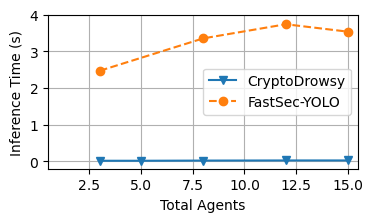

In [7]:
plt.figure(figsize=(4,2))
plt.plot(rlr_075_results['drowsy_agents']+rlr_075_results['rlr_agents'], rlr_075_results['d_inf_time'], marker='v',label='CryptoDrowsy')
plt.plot(drowsy_075_results['drowsy_agents']+drowsy_075_results['rlr_agents'], drowsy_075_results['r_inf_time'], marker='o', label='FastSec-YOLO',linestyle='--')
plt.legend(loc='center right')
plt.grid(True)
plt.xlim(0.5,15.5)
plt.ylim(-0.2,4)
plt.xlabel('Total Agents')
plt.ylabel('Inference Time (s)')
plt.savefig('figures/x_025_agents_sim.pdf',bbox_inches='tight',pad_inches=0.1)